# Desafio Guiado S5: Boosting Classifiers

* El
vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de
telecomunicaciones churn.

### Atributos

* State: Estado de Estados Unidos.
* Account Length: Tiempo en que la cuenta ha sido activada.
* Area Code: Código de área.
* International plan: Plan internacional activado.
* Voice mail plan: Plan de mensajes de voz activado.
* number_vmail_messages: Cantidad de mensajes de voz.
* total_day_minutes: Cantidad de minutos ocupados en la mañana.
* total_day_calls: Cantidad de llamadas realizadas en la mañana.
* total_day_charge: Cobros realizados en la mañana.
* total_eve_minutes: Cantidad de minutos ocupados en la tarde.
* total_eve_calls: Cantidad de llamadas realizadas en la tarde.
* total_eve_charge: Cobros realizados en la tarde.
* total_night_calls: Cantidad de llamadas realizadas en la noche.
* tota_night_minutes: Cantidad de minutos ocupados en la noche.
* total_night_charge: Cobros realizados en la noche.
* total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
* total_intl_calls: Cantidad de llamadas internacionales realizadas.
* total_intl_charge: Cobros realizados por llamadas internacionales.
* churn: 1 si el cliente se cambió de compañía, 0 de los contrario.
*     Los datos provienen del paquete AppliedPreditiveModeling de R

### Ejercicio 1: Preprocessing

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente.
Reporte brevemente el comportamiento de las variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [2]:
churn_train = pd.read_csv('churn_train.csv').drop(columns=['Unnamed: 0'])
churn_test = pd.read_csv('churn_test.csv').drop(columns=['Unnamed: 0'])

In [3]:
churn_train.shape

(3333, 20)

In [4]:
churn_test.shape

(1667, 20)

In [5]:
df =pd.concat([churn_train, churn_test])

In [6]:
df.shape

(5000, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [8]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


* En base al comportamiento de los atributos, considere si es necesario implementar
alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden
transformarlas con su logaritmo

In [9]:
var_continua = []
var_objects = []
var_prefix = []
for index, row in df.items():
    if row.dtype == 'object':
        var_objects.append(index)
        var_prefix.append(f'{index[0:2]}{index[-3:]}')
    else:
        var_continua.append(index)
# Se guarda el diccionario de recodificacion 
dic_recod = dict(zip(var_prefix,var_objects))

In [10]:
var_continua

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [11]:
dic_recod

{'state': 'state',
 'arode': 'area_code',
 'inlan': 'international_plan',
 'volan': 'voice_mail_plan',
 'churn': 'churn'}

<Axes: xlabel='state', ylabel='Count'>

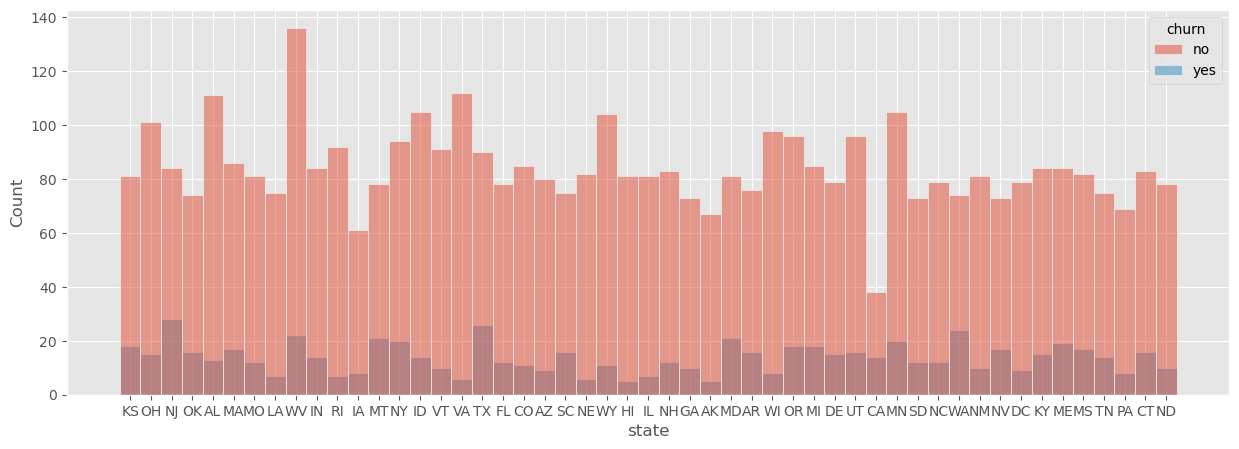

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='state', hue='churn', )

In [13]:
def graficar_discreto(data, lista_variables, figura=(10,5), sep_plot=0.4, filas=1):
    columnas = int(len(lista_variables)/filas)
    fig = plt.figure(figsize=figura)
    fig.subplots_adjust(hspace=sep_plot)
    for n, col in enumerate(lista_variables):
        plt.subplot(filas,columnas, n+1)
        sns.countplot(data=data, x=col)

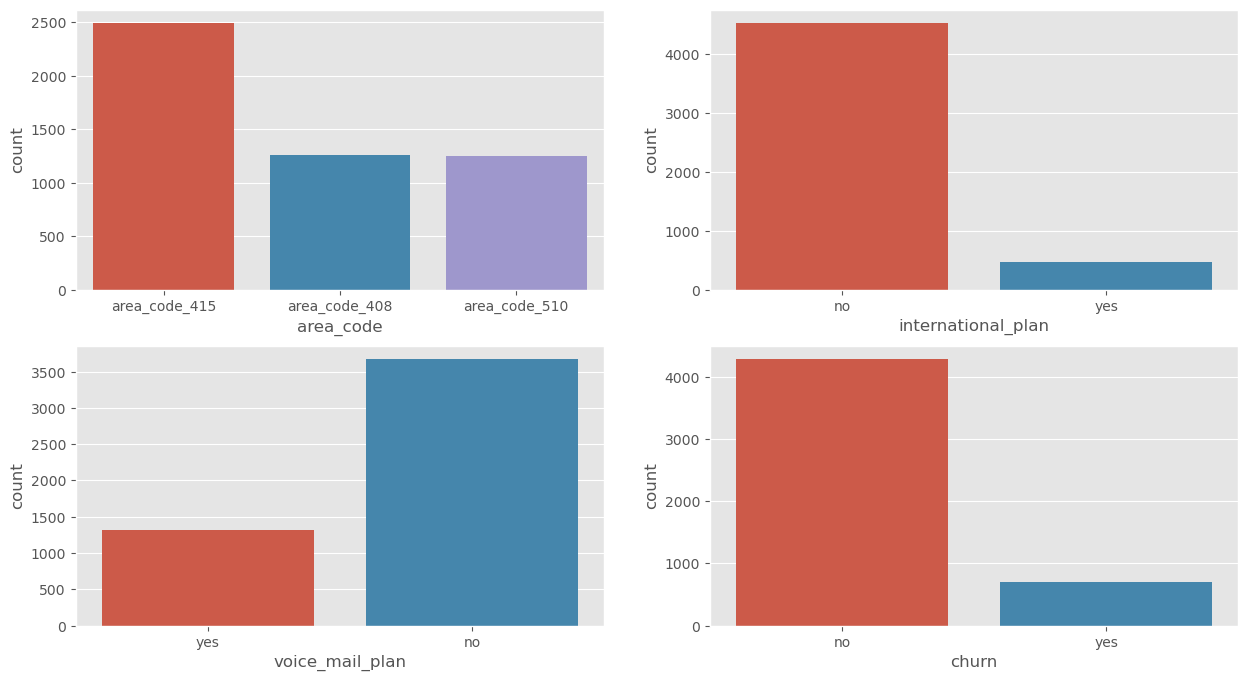

In [14]:
graficar_discreto(df,var_objects[1:], figura=(15,8), sep_plot=.2, filas=2)

* el vector objetivo churn posee una alta concentracion de datos para la categoria no.

In [15]:
def graficar_cont(data, lista_variables, distr='density',figura=(10,30), sep_plot=0.4, filas=1): 
    '''
    Grafica variables continuas mostrando su media y mediana,
    con la curva de tendencia normal.
    '''
    columnas = int(len(lista_variables)/filas)
    fig = plt.figure(figsize=figura)  # tamaño de la figura
    fig.subplots_adjust(hspace=sep_plot)  # ajuste de las subplots

    for n, col in enumerate(lista_variables):
        plt.subplot(filas, columnas, n+1)
        sns.histplot(data[col], stat=distr, color='royalblue')
        if distr=='density':
            sns.kdeplot(data[col], color='tomato', lw=1)
        plt.axvline(data[col].mean(), color='green', label='media')
        plt.axvline(data[col].median(), color='black', label='mediana')
        plt.title(col)
        plt.xlabel("")
        #plt.legend()
        plt.tight_layout()
    plt.legend()

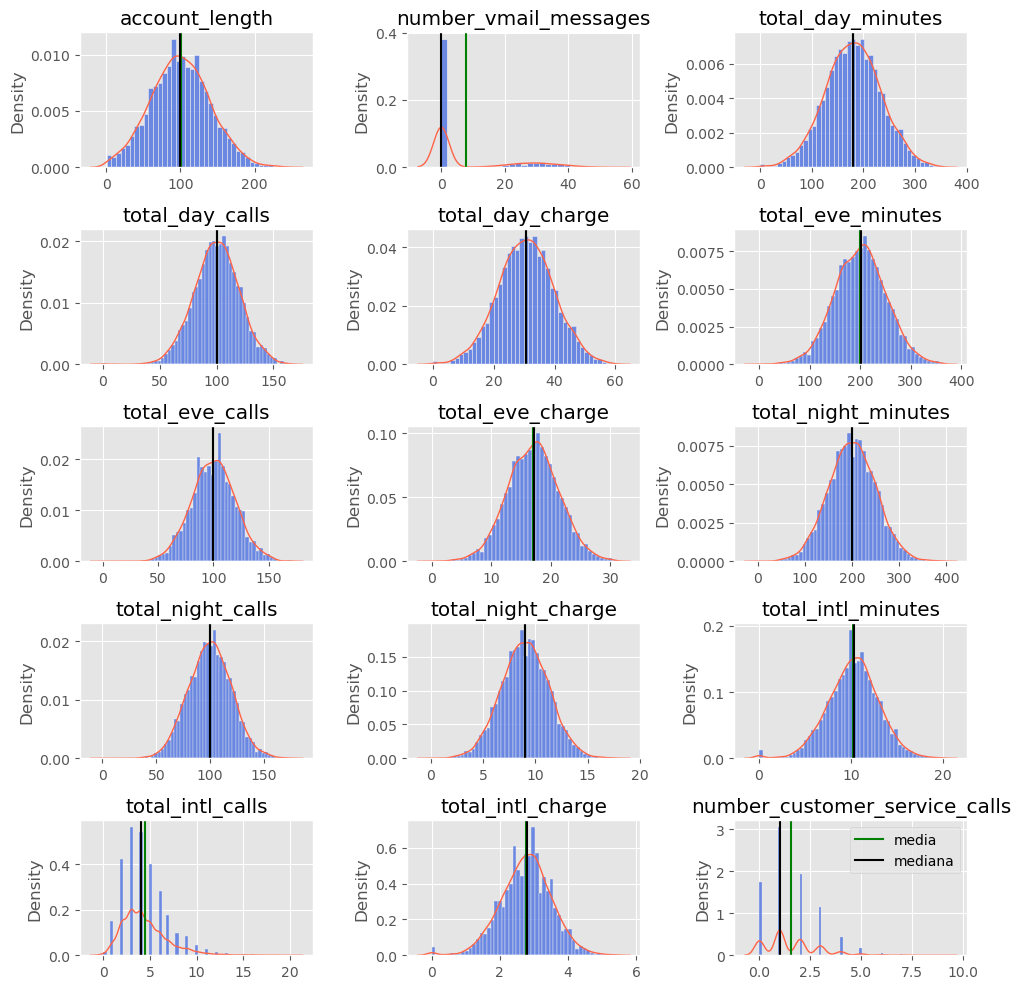

In [16]:
graficar_cont(df, var_continua, distr='density',figura=(10,10), sep_plot=0,filas=5)

In [17]:
cols_asim = [ 'number_vmail_messages', 'total_intl_calls',
              'number_customer_service_calls']

* La mayoria de las variables muestran un comportamiento con  tendencia normal.
* number_vmail_messages, total_intl_calls, number_custom_messages son variables que no se comportan con tendencia normal.

* se realizara la estandarizacion logaritmica de todas las variables, cuando se realice el train test split
* ahora se recodificara las variables categoricas.
* segun los requerimentos del desafio se utiliza la matriz churn_train. 

In [18]:
rec_bin = pd.get_dummies(churn_train[var_objects], prefix=var_prefix,drop_first=True)
rec_bin.sample(4)

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VT,state_WA,state_WI,state_WV,state_WY,arode_area_code_415,arode_area_code_510,inlan_yes,volan_yes,churn_yes
874,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df_bin = churn_train.drop(columns=var_objects).copy()
df_bin = pd.concat([df_bin, rec_bin], axis=1).copy()
df_bin.shape

(3333, 70)

In [20]:
y = df_bin['churn_yes']
y.value_counts()

0    2850
1     483
Name: churn_yes, dtype: int64

In [21]:
X_pre = df_bin.drop(columns='churn_yes').copy()
X_pre.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,arode_area_code_415,arode_area_code_510,inlan_yes,volan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [22]:
for col in cols_asim:
    X_pre[col] = X_pre[col].apply(lambda x: np.log(x+0.001))

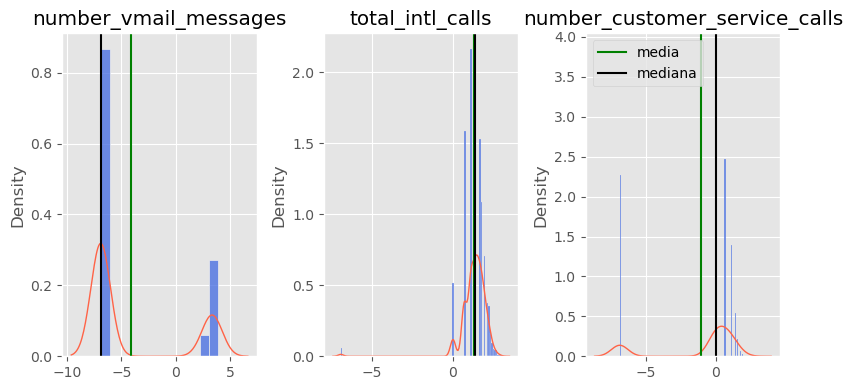

In [23]:
graficar_cont(X_pre, cols_asim, distr='density',figura=(8,4), sep_plot=0,filas=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pre,
                                    y,random_state=1991, test_size=.33)
print(f'''X_train {X_train.shape}
X_test {X_test.shape}
y_train {y_train.shape}
y_test {y_test.shape}''')


X_train (2233, 69)
X_test (1100, 69)
y_train (2233,)
y_test (1100,)


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad
predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla
con las siguientes especificaciones:
* Si el tiempo de computación es alto, puede implementar la búsqueda con 1
validación cruzada
* Reporte las métricas para los mejores modelos.

In [25]:
ada_params = { 
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 1000, 2000]
}
gboost_params = { 
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 1000, 2000],
    'subsample': [0.1, 0.5, 0.9] 
}

In [26]:
modelo_grilla_ada = GridSearchCV(estimator=AdaBoostClassifier(random_state=1991),
                             param_grid=ada_params,
                             cv=3,
                             )

In [27]:
modelo_grilla_ada.fit(X_train, y_train)
best_ada = modelo_grilla_ada.best_estimator_

In [28]:
modelo_grilla_gboost = GridSearchCV(estimator=GradientBoostingClassifier(random_state=1991),
                             param_grid=gboost_params,
                             cv=3,
                             )

In [29]:
modelo_grilla_gboost.fit(X_train, y_train)
best_gboost = modelo_grilla_gboost.best_estimator_

In [30]:
best_ada

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=1991)

In [31]:
ada_yhat = best_ada.predict(X_test)

In [32]:
print(classification_report(y_test, ada_yhat))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       937
           1       0.67      0.37      0.48       163

    accuracy                           0.88      1100
   macro avg       0.78      0.67      0.71      1100
weighted avg       0.87      0.88      0.87      1100



In [33]:
best_gboost

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=1991, subsample=0.5)

In [34]:
gboost_yhat = best_gboost.predict(X_test)

In [35]:
print(classification_report(y_test, gboost_yhat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       937
           1       0.93      0.76      0.84       163

    accuracy                           0.96      1100
   macro avg       0.94      0.88      0.90      1100
weighted avg       0.95      0.96      0.95      1100



* Ambos modelos presentan buena capacidad predictiva, adaBoost el mas bajo con accuracy de .88
* AdaBoost muestra deficiencia en detectar los casos positivos con un f1-score de .48, a diferencia de gboost que logra capturar el comportamiento de ambos casos con buen desempeño.
* gboost es superior al otro modelo.

### Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente
cuáles son los que aumentan la probabilidad de fuga en los clientes.


In [36]:
def graficar_importancia(modelo, lista_col, nro_a_imprimir=10): 
    importancia = modelo.feature_importances_
    indices = np.argsort(importancia)[::-1]
    indices_10 = indices[0:nro_a_imprimir]
    names = [lista_col[i] for i in indices_10]
    plt.title("Feature importance")
    plt.barh(range(len(names)), importancia[indices_10])
    plt.yticks(range(len(names)), names, rotation=0)

    return names

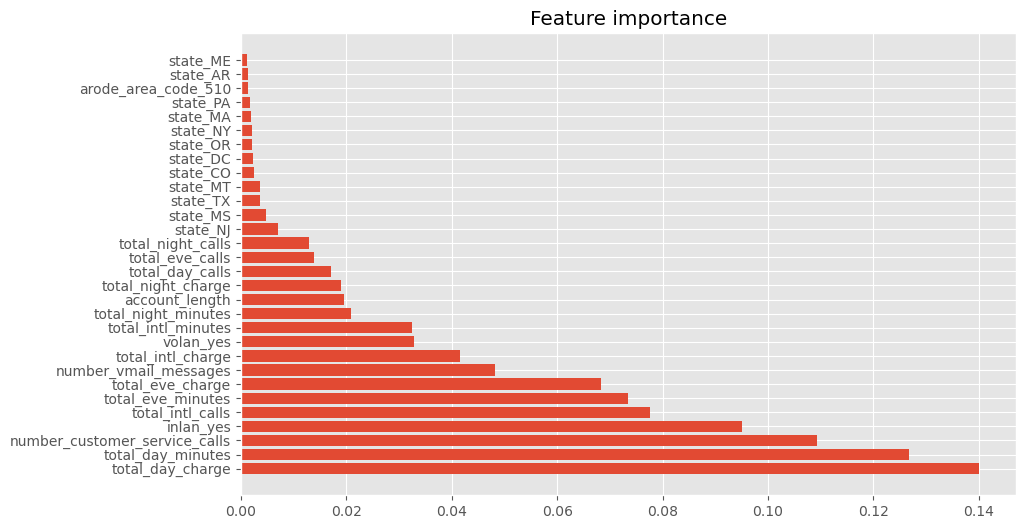

In [37]:
name_best_col = graficar_importancia(best_gboost, X_train.columns, nro_a_imprimir=30)

Las variables que mas afectan al vector objetivo, por ende a la probabilidad de fuga, son number_customer_service_calls, total_day_minutes, total_day_charge.

### Ejercicio 4: Probabilidad de fuga

* El gerente general necesita saber en qué estados hay una mayor probabilidad de
fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad
de fuga.

In [38]:
gboost_y_pr = best_gboost.predict_proba(X_test)

In [39]:
gboost_y_pr.shape

(1100, 2)

In [40]:
df_proba = pd.DataFrame(gboost_y_pr,columns=[0,1])
df_proba

,0,1
0,0.980741,0.019259
1,0.978818,0.021182
2,0.956493,0.043507
3,0.522993,0.477007
4,0.972281,0.027719
...,...,...
1095,0.965342,0.034658
1096,0.942252,0.057748
1097,0.976488,0.023512
1098,0.974831,0.025169


In [41]:
X_test.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', '

In [42]:
df_estados = X_test.loc[:,'state_AL':'state_WY'].copy()
df_estados.shape

(1100, 50)

In [43]:
medias = []
ids = []
for i in df_estados.columns:
    tmp_proba = df_estados[i] * df_proba[1]
    medias.append(tmp_proba.mean())
    ids.append(i)

In [44]:
data_estados = pd.DataFrame({'estado': ids, 'proba': medias})

<Axes: xlabel='estado'>

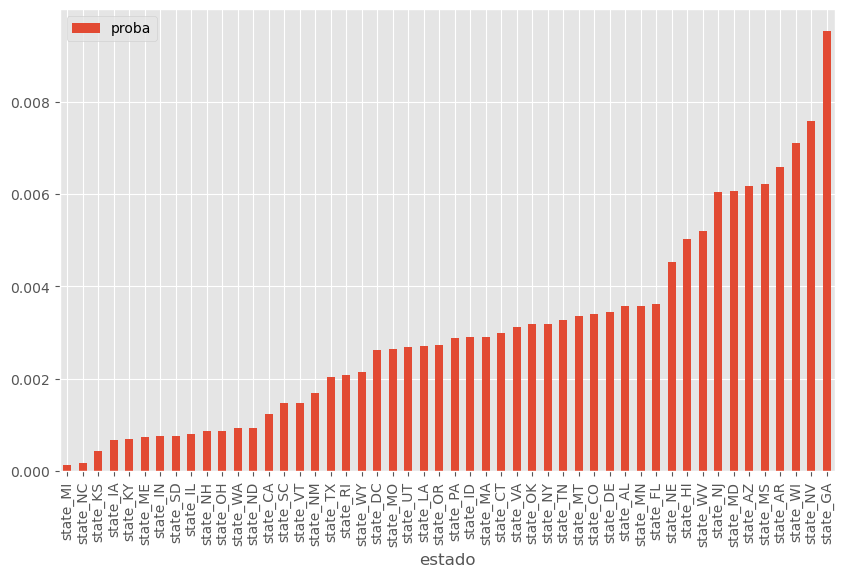

In [45]:
data_estados.sort_values(by='proba').plot(kind='bar', x='estado')

Los estados con mayor probabilidad de fuga son GA, NV y WI.

* Implemente el modelo predictivo con el archivo churn_test.csv.
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función
predict_proba del modelo.

In [46]:
rec_bin2 = pd.get_dummies(churn_test[var_objects], prefix=var_prefix,drop_first=True)
df_bin2 = churn_test.drop(columns=var_objects).copy()
df_bin2 = pd.concat([df_bin2, rec_bin2], axis=1).copy()

In [47]:
df_bin2.shape

(1667, 70)

In [48]:
df_bin2.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', '

In [49]:
X_2 = df_bin2.drop(columns='churn_yes')

In [50]:
for col in cols_asim:
    X_2[col] = X_2[col].apply(lambda x: np.log(x+0.001))

In [51]:
gboost_y_pr2 = best_gboost.predict_proba(X_2)

In [52]:
gboost_y_hat2 = best_gboost.predict(X_2)

In [53]:
def indicadores_ml(y_test, y_hat, yhat_pr):
    '''      
    Imprime tablas y graficos con indicadores.
    '''
    print(classification_report(y_test, y_hat))
    false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr[:, 1])
    plt.title('Curva ROC')
    plt.plot(false_positive, true_positive, lw=1)
    plt.plot([0, 1], ls="--", lw=1)
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,c='limegreen', lw=3)
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')
    print(f'Area bajo la curva: {roc_auc_score(y_test, yhat_pr[:, 1])}')

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1443
           1       0.92      0.67      0.78       224

    accuracy                           0.95      1667
   macro avg       0.93      0.83      0.87      1667
weighted avg       0.95      0.95      0.94      1667

Area bajo la curva: 0.9144206019206019


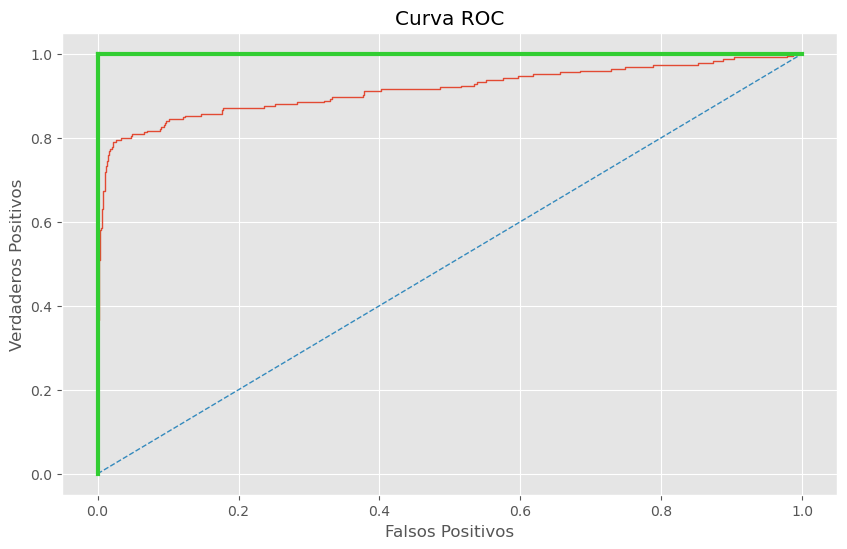

In [54]:
indicadores_ml(df_bin2['churn_yes'], gboost_y_hat2, gboost_y_pr2)

* El indicador accuracy F1 se mantiene 0.01 punto mas bajo, en .95.
* Baja la capacidad de predecir los casos positivos, donde f1 pasa de .84 a .78.
* a pesar de esto un area bajo la curva de .91 nos indica un ejercicio .41 mejor que un ejercicio aleatorio 50-50 en cuanto a predicciones. por ende estamos frente a un buen modelo.
